# INFO206B Fall 2022 Assignment 3

Sentiment analysis uses natural language processing, text analysis, and other methods to systematically identify, extract, quantify, and study affective information in many different contexts. In this assignment, you will perform a simple sentiment analysis on different texts, ranging from tweets to tomes. In the process, you will learn about the design, implementation, and performance evaluation of search algorithms and data structures.

# DRAKE'S INSTRUCTIONS FOR RUNNING THIS CODE
Just wanted to put this here so you're not stuck staring at code for like 20 minutes.

**You are free to hit run all to start with on this entire Jupiter notebook**. I've commented out all the blocks that run the sentiment calculation functions, so you'll just be compiling the functions. 

You can uncomment the last two blocks of Python code (cells?) to run everything. That'll output everything the assignment asks for.

The second to last cell does all the calculation. That's the one you'll be staring at for a few minutes (shoutout to linear search). I separated all the outputting into a separate block (the last Python blockn) just so I didn't have to wait for all the sentiment calculation to run every time I wanted to slightly tweak output formatting.

The last python just does all the outputting, and uses variables generated in block n-1. 

The final cell is just the markdown text of my interpretation. 

## Part 1. Tweets (5 points)

You are given a [list of famous (or infamous) tweets](https://people.ischool.berkeley.edu/~chuang/i206/b3/tweets.txt). from the colored history of Twitter. Your task is to compute the sentiment of each tweet based on the sentiment scores of the words in the tweet. For this part of the assignment, the sentiment of a tweet is simply the sum of the sentiment scores for each word in the tweet.

You will use a hand-coded [sentiment lexicon developed by Finn Årup Nielsen](https://github.com/fnielsen/afinn). that contains a list of ~2,400 English words with sentiment scores ranging from -5 (most negative) to 5 (most positive). Your program will read the file [AFINN-111.txt](https://people.ischool.berkeley.edu/~chuang/i206/b3/AFINN-111.txt) into a dictionary data structure. (Note that the file is tab delimited, so you will want to use the `“\t”` argument for your split method.)

For each of the ten tweets, you should split the tweet into its component words, removing any whitespaces and punctuations, and converting the words to lowercase. Then, you look up the sentiment score for each word in the dictionary. If a word is not found, its score is zero. The sentiment score of the tweet is the sum of the scores of the individual words. Print the tweet and its sentiment score.

In [40]:
import string

#strip word of punctuation and convert to all lower-case
def stripWord( w ):
    w = w.translate(str.maketrans('', '', string.punctuation))
    w = w.lower()
    return( w )

In [41]:
# make the lexicon
# open the file
lexicon_contents = open("AFINN-111.txt", "r")
# turn it into a list
file_lines = lexicon_contents.readlines()

# trace trace trace
#print(file_lines)

# start the dictionary
lex_dict = {}

# strip the lexicon into list of list 
for i in range(len(file_lines)):
    file_lines[i] = file_lines[i].strip().split("\t")
    # add the keys/values to the dictionary 
    lex_dict[file_lines[i][0]] = int(file_lines[i][1])

#print(file_lines)
#print(lex_dict)

# close the file
lexicon_contents.close()

# define the function
def tweet_sentiment(in_file):


    ### SENTIMENT DICTIONARY IS MADE

    # Now it's time for reading the actual file of tweets
    tweet_contents = open(in_file, "r")
    tweet_lines = tweet_contents.readlines()

    # loop over contents
    for i in range(len(tweet_lines)):
        # strip the newline
        tweet_lines[i] = tweet_lines[i].strip()
        # print out the tweet
        print("Tweet", i, ":", tweet_lines[i])
        # now we strip into component words
        tweet_lines[i] = tweet_lines[i].split()
        
        
        #define the sentiment
        sentiment_max = 0

        # now we need to add up the sentiment of all words
        for j in range(len(tweet_lines[i])):
            # strip word it
            the_word = stripWord(tweet_lines[i][j])
            
            # check to see if it's in there
            if the_word in lex_dict:
                # if it is, add to the value
                sentiment_max += lex_dict[the_word]
                #print(the_word, lex_dict[the_word])
        #print(tweet_lines[i])
        # print it out!
        print("Tweet sentiment:", sentiment_max, "\n")
    tweet_contents.close()

## MAIN 
tweet_sentiment("tweets.txt")

Tweet 0 : just setting up my twttr
Tweet sentiment: 0 

Tweet 1 : there's a plane in the Hudson. I'm on the ferry going to pick up the people. Crazy.
Tweet sentiment: -2 

Tweet 2 : Are you ready to celebrate? Well, get ready: We have ICE!!!!! Yes, ICE, *WATER ICE* on Mars! woot!!! Best day ever!!
Tweet sentiment: 7 

Tweet 3 : Arrested
Tweet sentiment: -3 

Tweet 4 : HI TWITTERS . THANK YOU FOR A WARM WELCOME. FEELING REALLY 21ST CENTURY .
Tweet sentiment: 6 

Tweet 5 : Hello Twitterverse! We r now LIVE tweeting from the International Space Station -- the 1st live tweet from Space! :) More soon, send your ?s
Tweet sentiment: 0 

Tweet 6 : OK, What The Hell Is "Weird Twitter"?
Tweet sentiment: -6 

Tweet 7 : Please retweet this to spread awareness for retweets.
Tweet sentiment: 1 

Tweet 8 : If only Bradley's arm was longer. Best photo ever. #oscars
Tweet sentiment: 3 

Tweet 9 : admiring my award winning masterpiece -- super stunning roflcopter tweet ftw woohoo!
Tweet sentiment: 31 



## Part 2. Tomes (9 points)

Moving from tweets to tomes, we want to evaluate the run-time efficiency of different data structures and search algorithms for supporting sentiment analysis as we scale up the size of the input files.

You will measure and compare the run-times of three different search strategies on texts of different sizes.

Python's time package provides a timestamp function that you can use:

```
import time
tstart = time.time()
\# the main loop of your code goes here
tstop = time.time()
elapsed_time = tstop - tstart
```

 

Strategy 1 – dictionary lookup: For each word in a tome, look up its sentiment score from the dictionary you constructed in Part 1, and sum up the scores for all the words in the tome. Divide the sum by the number of words to obtain the normalized sentiment score of the tome. Record the elapsed time for processing all the words in your tome. Do not include the time for reading in the text file and constructing the dictionary. Only include your main loop that performs the dictionary lookups for the words.

Strategy 2 – linear search: First, construct a new sentiment lexicon using two lists. We will take advantage of the fact that the AFINN file's word entries are already sorted alphabetically. The first list contains the word entries, while the second list contains the word's corresponding sentiment scores. Now, for each word in your tome, perform a linear search for the word in the first list. If and when the word is found, use the list index to look up the word's score in the second list. If you reach the end of the first list and cannot find the word, then the word's score is zero. Once again, sum up the scores for all the words, then compute the normalized sentiment score for the tome. Record the elapsed time for processing all the words in your tome.

Strategy 3 – binary search: This strategy is basically the same as Strategy 2, and you should use the same two lists from above. However, for each word in your tome, you perform a binary search instead of a linear search. You can re-use the binary search function that you wrote for Assignment 2. (While your Assignment 2 binary search function was written to search for numbers in a list, it should work for searching for text strings with little or no modification, since the AFINN word entries are already sorted alphabetically.)

Write a function for each of the three strategies. For each function, return (i) the number of words in the tome, (ii) the elapsed time, and (ii) the normalized sentiment score of the tome.

Run your functions for tomes of different sizes. [Project Gutenberg](https://www.gutenberg.org/) is a good source of long texts:

- [The Complete Works of William Shakespeare](https://people.ischool.berkeley.edu/~chuang/i206/b3/shakespeare.txt) (~900k words)

- [Les Misérables](https://people.ischool.berkeley.edu/~chuang/i206/b3/les-miserables.txt) (~500k words)
- [The Odyssey](https://people.ischool.berkeley.edu/~chuang/i206/b3/odyssey.txt) (~100k words)
- [Alice’s Adventure in Wonderland](https://people.ischool.berkeley.edu/~chuang/i206/b3/alice.txt)] (~10k words) 

In addition to these four tomes, choose a few more of your favorite books.

To wrap up your analysis, produce these three outputs:

Report the normalized sentiment scores of all the tomes you have analyzed.
Use `matplotlib` to generate a graph that plots run-time (in the y-axis) versus tome length in words (x-axis), using Red, Green, and Blue for strategies 1, 2, and 3 respectively.
Interpret your results in a few sentences, e.g., how do you interpret the normalized sentiment scores and the graph of run-time vs. tome length for the three strategies.

In [42]:
import time

#test_list = ["death", "death", "death", "death", "death", "death", "death", "death", "death", "death"]

def dict_sent(in_file):
    # open the file. Added the encoding argument because I was getting a weird bug
    # probably something because I'm bouncing between Mac and PC while I'm doing this 
    file_contents = open(in_file, "r", encoding="utf-8")
    file_words = file_contents.read().split()
    

    # set starting sentiment score
    sentiment = 0
    # define wordCount since we use it more than once
    wordCount = len(file_words)
    # debugging, ignore
    #bug_list = []
    # loop over the file contents
    start = time.time()
    for i in range(len(file_words)):
        # strip the words
        file_words[i] = stripWord(file_words[i].strip())
        # check if the word is in the dictionary
        if file_words[i] in lex_dict:
            # add its sentiment if it is found 
            sentiment += lex_dict[file_words[i]]
            #bug_list.append(file_words[i])
    stop = time.time()
    elapsedTime = stop - start
    #bug_list.append(str(len(bug_list)))
        
    #normalize sentiment
    normSent = sentiment / wordCount
            
    #print(file_words)
    
    #print(sentiment)
    #bug_file = open("bug_file1.txt", "w")
    #bug_list.sort()
    #bug_file.write(str(bug_list))
    file_contents.close()

    return wordCount, elapsedTime, normSent

### MAIN
# Define our text file list because I'm neurotic with my print formatting
text_files = ["alice.txt", "dracula.txt", "grimms.txt", "les-miserables.txt", "metamorphosis.txt", "odyssey.txt", "shakespeare.txt"]

# Dictionary Search output
#print("###DICTIONARY SEARCH###\n")
# for each in text_files:
#     wordCount, elapsedTime, normSent = dict_sent(each)
#     print("Title:", each, "\nWord Count:", wordCount, "\nElapsed Time:", elapsedTime, "\nNormalized Sentiment Score:", normSent, "\n")

#dict_sent("test_list.txt")






In [43]:
# construct the linear lists for the keys and values
lex_keys = list(lex_dict.keys())
lex_values = list(lex_dict.values())
#print(lex_keys)
#print(lex_values)

# define the linear search function
def linear_sent(in_file):
    # open the file
    file_contents = open(in_file, "r", encoding="utf-8")
    file_words = file_contents.read().split()
    file_contents.close()

    # set starting sentiment score
    sentiment = 0
    # define wordCount since we use it more than once
    wordCount = len(file_words)
    
    # loop over the file contents
    start = time.time()
    for i in range(len(file_words)):
        # strip the words
        file_words[i] = stripWord(file_words[i].strip())
        # loop over the keys and values 
        for j in range(len(lex_keys)):
            # check each key and see if it equals our value 
            if lex_keys[j] == file_words[i]:
                # if it is, add it to the sentiment and break 
                sentiment += lex_values[j]
                break
    stop = time.time()
    elapsedTime = stop - start
    #print(sentiment)
    
    # normalize sentiment
    normSent = sentiment / wordCount
    # return values 
    return wordCount, elapsedTime, normSent

        

    #print(file_words)


## MAIN
#linear_sent("dracula.txt")

# Commented out so I don't have to wait an eternity every time I run all cells :)
# for each in text_files:
#    wordCount, elapsedTime, normSent = linear_sent(each)
#    print("Title:", each, "\nWord Count:", wordCount, "\nElapsed Time:", elapsedTime, "\nNormalized Sentiment Score:", normSent, "\n")
# print("\n\n\n")

In [44]:
# define the function
def binary_search(the_list, key, left_index, right_index):
    # doing > because the left_index shouldn't be greater than right index anyway, if they're the same
    # there's one element because indexing 
    if left_index > right_index:
        return None
   
    # printing for testin
    # print(the_list)
    # calculate the midpoint, round down
    midpoint = (left_index + right_index) // 2
    # print("The midpoint is:", midpoint)
    # printing for checking the math, looks good 
    #print(midpoint)

    # check if our midpoint is the key
    if the_list[midpoint] == key:
        return midpoint
    # if midpoint is greater than our target, then recur on the left half of the list
    elif the_list[midpoint] > key:
        return binary_search(the_list, key, left_index, midpoint - 1)
    # if midpoints is less than our target, then recur on the left half of the list
    elif the_list[midpoint] < key:
        return binary_search(the_list, key, midpoint + 1, right_index)
    # otherwise, it's not there
    else:
        return None

In [45]:
#define the function
def binary_sent(in_file):
    # open the file
    file_contents = open(in_file, "r", encoding="utf-8")
    file_words = file_contents.read().split()
    file_contents.close()

    # set starting sentiment score
    sentiment = 0
    # define wordCount since we use it more than once
    wordCount = len(file_words)
    # loop over the file contents
    # tracing for debugging, ignore
    #bug_list = []
    start = time.time()
    for i in range(len(file_words)):
        # strip the words
        file_words[i] = stripWord(file_words[i].strip())
        searchIndex = binary_search(lex_keys, file_words[i], 0, len(lex_keys) - 1)
        if searchIndex:
            sentiment += lex_values[searchIndex]
            #bug_list.append(lex_keys[searchIndex])
    #bug_file = open("bug_file2.txt", "w")
    #bug_list.sort()
    #bug_list.append(str(len(bug_list)))
    #bug_file.write(str(bug_list))
    #bug_file
    stop = time.time()
    elapsedTime = stop - start
    normSent = sentiment / wordCount
    
    return wordCount, elapsedTime, normSent

## MAIN
#binary_sent("test_list.txt")

# for each in text_files:
#      wordCount, elapsedTime, normSent = binary_sent(each)
#      print("Title:", each, "\nWord Count:", wordCount, "\nElapsed Time:", elapsedTime, "\nNormalized Sentiment Score:", normSent, "\n")


In [46]:
import matplotlib.pyplot as plt

#plt.plot([1, 2, 3, 4])
#plt.show()

# declare variables for convenience
dictRuntimes = []
linRuntimes = []
binRuntimes = []
wordCounts = []
sentimentScores = []

# loop over and append all the calculations
for each in text_files:
    wordCount, elapsedTime, normSent = dict_sent(each)
    wordCounts.append(wordCount)
    dictRuntimes.append(elapsedTime)
    sentimentScores.append(normSent)
    wordCount, elapsedTime, normSent = linear_sent(each)
    linRuntimes.append(elapsedTime)
    wordCount, elapsedTime, normSent = binary_sent(each)
    binRuntimes.append(elapsedTime)



***SENTIMENT SCORES***
Title: alice.txt 
Normalized Sentiment Score: 0.0036041682989892657 


Title: dracula.txt 
Normalized Sentiment Score: 0.0031451132119088465 


Title: grimms.txt 
Normalized Sentiment Score: 0.005903924429767299 


Title: les-miserables.txt 
Normalized Sentiment Score: -0.002736878024241422 


Title: metamorphosis.txt 
Normalized Sentiment Score: 0.004024866501952658 


Title: odyssey.txt 
Normalized Sentiment Score: 0.015970873786407765 


Title: shakespeare.txt 
Normalized Sentiment Score: 0.013945961610997488 




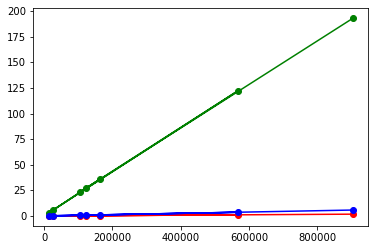

In [47]:
print("***SENTIMENT SCORES***")
for i in range(len(text_files)):
    print("Title:", text_files[i], "\nNormalized Sentiment Score:", sentimentScores[i], "\n\n")
    

plt.plot(wordCounts, dictRuntimes, 'ro-', wordCounts, linRuntimes, 'go-', wordCounts, binRuntimes, 'bo-')
plt.show()

### Interpretations

Well, as expected, the linear sort is by far the least efficient. It takes so much time running that you can barely see the difference between the dictionary sentiment and binary search sentiment calculation runtimes. This is because linear search is hugely inefficient - it uses no knowledge and has to loop over every single index every time it's search for something before it find what it's looking for. Dictionary search knows exactly where to look for the values its looking for, which is why it runs for the least amount of time. Binary search is a tad slower, but is still way more efficient than linear searching because it's not having to iterate over every single value. It's simply just splitting the sorted list in half every time until it finds what its looking for. 

As for sentiment scores - it's essentially the "average sentiment score per word" for each tome. Since we're dividing the full ultimate value by the amount of words, numbering in the hundreds of thousands in some cases, we have very tiny decimals. A majority of the words in a tome have no sentiment, so they're throwing diluting the sentiment score greatly. 